In [12]:
import pymongo

In [13]:
cliente = pymongo.MongoClient()

In [16]:
cliente.list_database_names()

['admin', 'companies_database', 'config', 'local']

In [15]:
db = cliente.companies_database
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'companies_database')

In [17]:
db.collection_names()

C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: DeprecationWarning: collection_names is deprecated. Use list_collection_names instead.
  """Entry point for launching an IPython kernel.


['example', 'companies']

In [18]:
colec = db.companies

In [19]:
colec

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'companies_database'), 'companies')

In [20]:
new_db = cliente['new_database'] #creando db en servidor

In [22]:
cliente.list_database_names()

['admin', 'companies_database', 'config', 'local']

In [23]:
new_db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'new_database')

In [24]:
new_colec = new_db.new_colec #creando nueva coleccion en db

In [25]:
new_colec

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'new_database'), 'new_colec')

In [41]:
dictio = {'nombre':'oscar', 'edad':28}
dictio_2 = {'nombre':'fanny', 'edad':24}

In [27]:
new_colec.insert_one(dictio)

In [28]:
new_colec.insert_one(dictio_2)

In [31]:
list(new_colec.find())

[{'_id': ObjectId('601d70c40614ee249be3e696'), 'nombre': 'oscar', 'edad': 28},
 {'_id': ObjectId('601d70d80614ee249be3e697'), 'nombre': 'fanny', 'edad': 24}]

In [33]:
example_colec = db.example

In [38]:
list(example_colec.find().limit(2))

[{'_id': ObjectId('601d6f307a142e5bccb1dd61'), 'a': 1, 'b': 2, 'c': 3},
 {'_id': ObjectId('601d6f307a142e5bccb1dd62'),
  'a': 4,
  'b': 5,
  'c': [1, 2, 3, 4, 5, 5]}]

In [42]:
lst = [dictio, dictio_2]
lst

[{'nombre': 'oscar', 'edad': 28}, {'nombre': 'fanny', 'edad': 24}]

In [43]:
example_colec.insert_many(lst)

In [44]:
list(example_colec.find())

[{'_id': ObjectId('601d6f307a142e5bccb1dd61'), 'a': 1, 'b': 2, 'c': 3},
 {'_id': ObjectId('601d6f307a142e5bccb1dd62'),
  'a': 4,
  'b': 5,
  'c': [1, 2, 3, 4, 5, 5]},
 {'_id': ObjectId('601d6f307a142e5bccb1dd63'), 'a': 7, 'b': 8, 'c': 9},
 {'_id': ObjectId('601d71dd0614ee249be3e698'), 'nombre': 'oscar', 'edad': 28},
 {'_id': ObjectId('601d71dd0614ee249be3e699'), 'nombre': 'fanny', 'edad': 24}]

In [47]:
list(colec.find().limit(2))[0].keys()

dict_keys(['_id', 'name', 'permalink', 'crunchbase_url', 'homepage_url', 'blog_url', 'blog_feed_url', 'twitter_username', 'category_code', 'number_of_employees', 'founded_year', 'founded_month', 'founded_day', 'deadpooled_year', 'tag_list', 'alias_list', 'email_address', 'phone_number', 'description', 'created_at', 'updated_at', 'overview', 'image', 'products', 'relationships', 'competitions', 'providerships', 'total_money_raised', 'funding_rounds', 'investments', 'acquisition', 'acquisitions', 'offices', 'milestones', 'video_embeds', 'screenshots', 'external_links', 'partners'])

In [50]:
list(colec.find({'name':'Facebook'}))[0].keys()

dict_keys(['_id', 'name', 'permalink', 'crunchbase_url', 'homepage_url', 'blog_url', 'blog_feed_url', 'twitter_username', 'category_code', 'number_of_employees', 'founded_year', 'founded_month', 'founded_day', 'deadpooled_year', 'deadpooled_month', 'deadpooled_day', 'deadpooled_url', 'tag_list', 'alias_list', 'email_address', 'phone_number', 'description', 'created_at', 'updated_at', 'overview', 'image', 'products', 'relationships', 'competitions', 'providerships', 'total_money_raised', 'funding_rounds', 'investments', 'acquisition', 'acquisitions', 'offices', 'milestones', 'ipo', 'video_embeds', 'screenshots', 'external_links', 'partners'])

In [52]:
list(colec.find({'name':'Facebook'}))[0]['created_at']

'Fri May 25 21:22:15 UTC 2007'

In [55]:
list(colec.find({'name':'Facebook'},{'created_at':1, 'name':1,'products':1}))

[{'_id': ObjectId('52cdef7c4bab8bd675297d8e'),
  'name': 'Facebook',
  'created_at': 'Fri May 25 21:22:15 UTC 2007',
  'products': [{'name': 'Facebook Platform', 'permalink': 'facebook-platform'},
   {'name': 'Facebook News Feed', 'permalink': 'facebook-news-feed'},
   {'name': 'Facebook Chat', 'permalink': 'facebook-chat'},
   {'name': 'Facebook Connect', 'permalink': 'facebook-connect'},
   {'name': 'Facebook Mobile', 'permalink': 'facebook-iphone-app'},
   {'name': 'Facebook', 'permalink': 'facebook-zero'},
   {'name': 'Facebook Lite', 'permalink': 'facebook-lite'},
   {'name': 'Facebook Places', 'permalink': 'facebook-places'}]}]

In [58]:
list(colec.find({'number_of_employees':{'$gte':2000}}, {'name':1,'created_at':1,'_id':0,'founded_year':1}))

[{'name': 'Facebook',
  'founded_year': 2004,
  'created_at': 'Fri May 25 21:22:15 UTC 2007'},
 {'name': 'eBay',
  'founded_year': 1995,
  'created_at': 'Wed Jun 06 13:03:13 UTC 2007'},
 {'name': 'Cisco',
  'founded_year': 1984,
  'created_at': 'Sat Jun 09 14:33:35 UTC 2007'},
 {'name': 'Yahoo!',
  'founded_year': 1994,
  'created_at': 'Sun Nov 04 01:48:15 UTC 2007'},
 {'name': 'Google',
  'founded_year': 1998,
  'created_at': 'Sat Jun 30 22:18:12 UTC 2007'},
 {'name': 'Intel',
  'founded_year': 1968,
  'created_at': 'Tue Feb 05 22:28:14 UTC 2008'},
 {'name': 'LinkedIn',
  'founded_year': 2003,
  'created_at': 'Tue Jul 17 04:21:55 UTC 2007'},
 {'name': 'Nintendo',
  'founded_year': 1889,
  'created_at': 'Sat Dec 22 13:27:00 UTC 2007'},
 {'name': 'Adobe Systems',
  'founded_year': 1982,
  'created_at': 'Thu Aug 09 01:22:40 UTC 2007'},
 {'name': 'Sony',
  'founded_year': 1946,
  'created_at': 'Fri Jul 27 12:47:37 UTC 2007'},
 {'name': 'PayPal',
  'founded_year': 1998,
  'created_at': 'We

In [63]:
list(colec.find({'$and':[{'number_of_employees':{'$gte':2000}},
                         {'founded_year':{'$lte':2007}}]}, 
                         {'name':1,'created_at':1,'_id':0}))

[{'name': 'Facebook', 'created_at': 'Fri May 25 21:22:15 UTC 2007'},
 {'name': 'eBay', 'created_at': 'Wed Jun 06 13:03:13 UTC 2007'},
 {'name': 'Cisco', 'created_at': 'Sat Jun 09 14:33:35 UTC 2007'},
 {'name': 'Yahoo!', 'created_at': 'Sun Nov 04 01:48:15 UTC 2007'},
 {'name': 'Google', 'created_at': 'Sat Jun 30 22:18:12 UTC 2007'},
 {'name': 'Intel', 'created_at': 'Tue Feb 05 22:28:14 UTC 2008'},
 {'name': 'LinkedIn', 'created_at': 'Tue Jul 17 04:21:55 UTC 2007'},
 {'name': 'Nintendo', 'created_at': 'Sat Dec 22 13:27:00 UTC 2007'},
 {'name': 'Adobe Systems', 'created_at': 'Thu Aug 09 01:22:40 UTC 2007'},
 {'name': 'Sony', 'created_at': 'Fri Jul 27 12:47:37 UTC 2007'},
 {'name': 'PayPal', 'created_at': 'Wed Aug 01 09:16:46 UTC 2007'},
 {'name': 'The Walt Disney Company',
  'created_at': 'Thu Aug 02 09:08:05 UTC 2007'},
 {'name': 'AOL', 'created_at': 'Fri Aug 03 06:26:04 UTC 2007'},
 {'name': 'Webkinz', 'created_at': 'Mon Aug 06 09:45:48 UTC 2007'},
 {'name': 'Sun Microsystems', 'created

In [64]:
list(colec.find({'$and':[{'number_of_employees':{'$gte':2000}},
                         {'founded_year':{'$lte':2007}}]}, 
                         {'name':1,'created_at':1,'_id':0}).sort('founded_year',-1).limit(4))

[{'name': 'Spotify', 'created_at': 'Mon Apr 28 19:10:19 UTC 2008'},
 {'name': 'Gemalto', 'created_at': 'Sat Nov 22 03:41:26 UTC 2008'},
 {'name': 'Webkinz', 'created_at': 'Mon Aug 06 09:45:48 UTC 2007'},
 {'name': 'Facebook', 'created_at': 'Fri May 25 21:22:15 UTC 2007'}]

In [66]:
colec.find({'$and':[{'number_of_employees':{'$gte':2000}},
                         {'founded_year':{'$lte':2007}}]}, 
                         {'name':1,'created_at':1,'_id':0})

In [71]:
list(colec.find({'ipo':{'$exists':True}},{'name':True,'ipo':True}).sort('ipo.valuation'))

[{'_id': ObjectId('52cdef7c4bab8bd675297d8d'), 'name': 'Digg', 'ipo': None},
 {'_id': ObjectId('52cdef7c4bab8bd675297d8e'),
  'name': 'Facebook',
  'ipo': {'valuation_amount': 104000000000,
   'valuation_currency_code': 'USD',
   'pub_year': 2012,
   'pub_month': 5,
   'pub_day': 18,
   'stock_symbol': 'NASDAQ:FB'}},
 {'_id': ObjectId('52cdef7c4bab8bd675297d8f'),
  'name': 'Omnidrive',
  'ipo': None},
 {'_id': ObjectId('52cdef7c4bab8bd675297d90'), 'name': 'Postini', 'ipo': None},
 {'_id': ObjectId('52cdef7c4bab8bd675297d91'), 'name': 'Geni', 'ipo': None},
 {'_id': ObjectId('52cdef7c4bab8bd675297d92'), 'name': 'Flektor', 'ipo': None},
 {'_id': ObjectId('52cdef7c4bab8bd675297d93'),
  'name': 'Fox Interactive Media',
  'ipo': None},
 {'_id': ObjectId('52cdef7c4bab8bd675297d94'),
  'name': 'Twitter',
  'ipo': {'valuation_amount': 18100000000,
   'valuation_currency_code': 'USD',
   'pub_year': 2013,
   'pub_month': 11,
   'pub_day': 7,
   'stock_symbol': 'NYSE:TWTR'}},
 {'_id': ObjectId('5

In [76]:
oficinas = colec.find({'offices':{'$not':{'$size':0}}},
                         {'name':True,'_id':0, 'offices':1})

In [77]:
data = list(oficinas)
data 

[{'name': 'Wetpaint',
  'offices': [{'description': '',
    'address1': '710 - 2nd Avenue',
    'address2': 'Suite 1100',
    'zip_code': '98104',
    'city': 'Seattle',
    'state_code': 'WA',
    'country_code': 'USA',
    'latitude': 47.603122,
    'longitude': -122.333253},
   {'description': '',
    'address1': '270 Lafayette Street',
    'address2': 'Suite 505',
    'zip_code': '10012',
    'city': 'New York',
    'state_code': 'NY',
    'country_code': 'USA',
    'latitude': 40.7237306,
    'longitude': -73.9964312}]},
 {'name': 'AdventNet',
  'offices': [{'description': 'Headquarters',
    'address1': '4900 Hopyard Rd.',
    'address2': 'Suite 310',
    'zip_code': '94588',
    'city': 'Pleasanton',
    'state_code': 'CA',
    'country_code': 'USA',
    'latitude': 37.692934,
    'longitude': -121.904945}]},
 {'name': 'Zoho',
  'offices': [{'description': 'Headquarters',
    'address1': '4900 Hopyard Rd',
    'address2': 'Suite 310',
    'zip_code': '94588',
    'city': 'Pleasa

In [74]:
import pandas as pd

In [78]:
df = pd.DataFrame(data)
df

,name,offices
0,Wetpaint,"[{'description': '', 'address1': '710 - 2nd Av..."
1,AdventNet,"[{'description': 'Headquarters', 'address1': '..."
2,Zoho,"[{'description': 'Headquarters', 'address1': '..."
3,Digg,"[{'description': None, 'address1': '135 Missis..."
4,Facebook,"[{'description': 'Headquarters', 'address1': '..."
...,...,...
13739,Oriact,"[{'description': '', 'address1': 'LÃ¤rchenweg ..."
13740,Adhunk,"[{'description': 'Indian Office', 'address1': ..."
13741,AfterLogic,"[{'description': 'Livingston', 'address1': 'P...."
13742,EnteGreat Solutions,"[{'description': '', 'address1': '', 'address2..."


In [79]:
from pandas.io.json import json_normalize

In [82]:
json_normalize(df['offices'][0])

,description,address1,address2,zip_code,city,state_code,country_code,latitude,longitude
0,,710 - 2nd Avenue,Suite 1100,98104,Seattle,WA,USA,47.603122,-122.333253
1,,270 Lafayette Street,Suite 505,10012,New York,NY,USA,40.723731,-73.996431


In [83]:
json_normalize(df['offices'][1])

,description,address1,address2,zip_code,city,state_code,country_code,latitude,longitude
0,Headquarters,4900 Hopyard Rd.,Suite 310,94588,Pleasanton,CA,USA,37.692934,-121.904945


In [84]:
json_normalize(df['offices'][3])

,description,address1,address2,zip_code,city,state_code,country_code,latitude,longitude
0,None,135 Mississippi St,,94107,San Francisco,CA,USA,37.764726,-122.394523


In [85]:
lista_data = [json_normalize(i) for i in df['offices']]

In [86]:
lista_data[0]

,description,address1,address2,zip_code,city,state_code,country_code,latitude,longitude
0,,710 - 2nd Avenue,Suite 1100,98104,Seattle,WA,USA,47.603122,-122.333253
1,,270 Lafayette Street,Suite 505,10012,New York,NY,USA,40.723731,-73.996431


In [87]:
lista_nombres = list(df['name'])
lista_nombres

['Wetpaint',
 'AdventNet',
 'Zoho',
 'Digg',
 'Facebook',
 'Omnidrive',
 'Postini',
 'Geni',
 'Flektor',
 'Fox Interactive Media',
 'Twitter',
 'StumbleUpon',
 'Gizmoz',
 'Scribd',
 'Slacker',
 'Lala',
 'Helio',
 'eBay',
 'MeetMoi',
 'Joost',
 'CBS',
 'Viacom',
 'Babelgum',
 'Plaxo',
 'Cisco',
 'Yahoo!',
 'Powerset',
 'Technorati',
 'SpinVox',
 'AddThis',
 'OpenX',
 'Mahalo',
 'Sparter',
 'Kyte',
 'Veoh',
 'Gannett',
 'Thoof',
 'Jingle Networks',
 'Info',
 'JotSpot',
 'Meetup',
 'Mercora',
 'NetRatings',
 'LifeLock',
 'Wesabe',
 'Jangl SMS',
 'SmugMug',
 'Prosper',
 'Google',
 'Jajah',
 'Skype',
 'YouTube',
 'Stickam',
 'blogTV',
 'Livestream',
 'Ustream',
 'AdaptiveBlue',
 'Pando Networks',
 'Intel',
 'GrandCentral',
 'Ikan',
 'delicious',
 'Topix',
 'Jobster',
 'Pownce',
 'Revision3',
 'AllPeers',
 'CriticalMetrics',
 'ZenZui',
 'Spock',
 'Wize',
 'SodaHead',
 'CastTV',
 'iSkoot',
 'EQO',
 'AllofMP3',
 'There',
 'SellABand',
 'Funny Or Die',
 'Steorn',
 'iContact',
 'MeeVee',
 'blink

In [88]:
print(len(lista_nombres), len(lista_data))

13744 13744


In [89]:
zip_nombre_df = list(zip(lista_nombres,lista_data))
zip_nombre_df

[('Wetpaint',
    description              address1    address2 zip_code      city state_code  \
  0                  710 - 2nd Avenue  Suite 1100    98104   Seattle         WA   
  1              270 Lafayette Street   Suite 505    10012  New York         NY   
  
    country_code   latitude   longitude  
  0          USA  47.603122 -122.333253  
  1          USA  40.723731  -73.996431  ),
 ('AdventNet',
      description          address1   address2 zip_code        city state_code  \
  0  Headquarters  4900 Hopyard Rd.  Suite 310    94588  Pleasanton         CA   
  
    country_code   latitude   longitude  
  0          USA  37.692934 -121.904945  ),
 ('Zoho',
      description         address1   address2 zip_code        city state_code  \
  0  Headquarters  4900 Hopyard Rd  Suite 310    94588  Pleasanton         CA   
  
    country_code   latitude   longitude  
  0          USA  37.692934 -121.904945  ),
 ('Digg',
    description            address1 address2 zip_code           cit

In [96]:
concat_df = pd.DataFrame()

In [97]:
for i in zip_nombre_df:
    i[1]['company'] = i[0]

In [98]:
for i in range(len(zip_nombre_df)):
    concat_df = pd.concat([concat_df,zip_nombre_df[i][1]])

In [99]:
concat_df

,description,address1,address2,zip_code,city,state_code,country_code,latitude,longitude,company
0,,710 - 2nd Avenue,Suite 1100,98104,Seattle,WA,USA,47.603122,-122.333253,Wetpaint
1,,270 Lafayette Street,Suite 505,10012,New York,NY,USA,40.723731,-73.996431,Wetpaint
0,Headquarters,4900 Hopyard Rd.,Suite 310,94588,Pleasanton,CA,USA,37.692934,-121.904945,AdventNet
0,Headquarters,4900 Hopyard Rd,Suite 310,94588,Pleasanton,CA,USA,37.692934,-121.904945,Zoho
0,None,135 Mississippi St,,94107,San Francisco,CA,USA,37.764726,-122.394523,Digg
...,...,...,...,...,...,...,...,...,...,...
0,,LÃ¤rchenweg 7,,6403,KÃ¼ssnacht,None,CHE,47.088219,8.437163,Oriact
0,Indian Office,Near Tube Well(south),Patel Nagar,334003,Bikaner,None,IND,NaN,NaN,Adhunk
0,Livingston,P.O. Box 2096,,07039,Livingston,NJ,USA,40.793024,-74.323554,AfterLogic
0,,,,,Birmingham,AL,USA,33.518885,-86.816068,EnteGreat Solutions


In [100]:
df_cord =concat_df[['latitude','longitude','company']]

In [101]:
df_cord

,latitude,longitude,company
0,47.603122,-122.333253,Wetpaint
1,40.723731,-73.996431,Wetpaint
0,37.692934,-121.904945,AdventNet
0,37.692934,-121.904945,Zoho
0,37.764726,-122.394523,Digg
...,...,...,...
0,47.088219,8.437163,Oriact
0,NaN,NaN,Adhunk
0,40.793024,-74.323554,AfterLogic
0,33.518885,-86.816068,EnteGreat Solutions


In [102]:
import folium

In [109]:
mapa = folium.Map(location = [39.83,-97.04], zoom_start = 7)
mapa

In [112]:
m = folium.Map(
    location=[45.372, -121.6972],
    zoom_start=12,
    tiles='Stamen Terrain'
)

In [113]:
m

In [114]:
folium.CircleMarker([45.372, -121.6972], radius = 40, icon = folium.Icon()).add_to(m)

In [115]:
m

In [116]:
mapa2=folium.Map(location=[19.41, -99.16], tiles='stamentoner', zoom_start=12)
lat=[19.42, 19.4, 19.43, 19.39, 19.42, 19.38]
lng=[-99.1, -99.15, -99.13 ,-99.12, -99.09, -99.11]

In [117]:
mapa2

In [118]:
for i in range(len(lat)):
    folium.Marker([lat[i], lng[i]], icon=folium.Icon(color='red'),popup = '<b>Estos son popups!!</b>', tooltip = 'tooltip').add_to(mapa2)
    
mapa2

In [121]:
m = folium.Map(
    location=[35.68159659061569, 139.76451516151428],
    zoom_start=16
)



# longitud y latitud por orden.
lines = [
    {
        'coordinates': [
            [139.76451516151428, 35.68159659061569],
            [139.75964426994324, 35.682590062684206],
        ],
        'dates': [
            '2017-06-02T00:00:00',
            '2017-06-02T00:10:00'
        ],
        'color': 'red'
    },
    {
        'coordinates': [
            [139.75964426994324, 35.682590062684206],
            [139.7575843334198, 35.679505030038506],
        ],
        'dates': [
            '2017-06-02T00:10:00',
            '2017-06-02T00:20:00'
        ],
        'color': 'blue'
    },
    {
        'coordinates': [
            [139.7575843334198, 35.679505030038506],
            [139.76337790489197, 35.678040905014065],
        ],
        'dates': [
            '2017-06-02T00:20:00',
            '2017-06-02T00:30:00'
        ],
        'color': 'green',
        'weight': 15,
    },
    {
        'coordinates': [
            [139.76337790489197, 35.678040905014065],
            [139.76451516151428, 35.68159659061569],
        ],
        'dates': [
            '2017-06-02T00:30:00',
            '2017-06-02T00:40:00'
        ],
        'color': '#FFFFFF',
    },
]




features = [
    {
        'type': 'Feature',
        'geometry': {
            'type': 'LineString',
            'coordinates': line['coordinates'],
        },
        'properties': {
            'times': line['dates'],
            'style': {
                'color': line['color'],
                'weight': line['weight'] if 'weight' in line else 5
            }
        }
    }
    for line in lines
]

plugins.TimestampedGeoJson({
    'type': 'FeatureCollection',
    'features': features,
}, period='PT1M', add_last_point=True).add_to(m)

#display(m)



m.save('mapa_continuo.html')

m

In [120]:
from folium import plugins

In [123]:
import datetime
import pandas as pd
import geopandas as gpd
import json
from bokeh.io import curdoc, output_notebook, show, output_file
from bokeh.models import Slider, HoverTool, GeoJSONDataSource, LinearColorMapper, ColorBar
from IPython.display import YouTubeVideo
from bokeh.plotting import figure
from bokeh.palettes import brewer, all_palettes, small_palettes

In [124]:
data = gpd.read_file('data\PHLITL_2000.shp')
data

,AREA,PERIMETER,DPHLIL_,DPHLIL_ID,EDO_NUM,EDO_LEY,MPO_NUM,MPO_LEY,PHLI_TOT,PHLI_TML1,PHLI_TML2,PHLI_TML3,PHLI_TML4,ICON_TML1,ICON_TML2,ICON_TML3,ICON_TML4,DPHLIL_NUM,DPHLIL_LEY,geometry
0,1.311912e+10,7.801129e+05,2,1473,2,Baja California,2002.0,Mexicali,5480,862,234,439,3945,0.26,0.39,0.92,3.79,8,"De 15,000 y mas","POLYGON ((788992.760 3707437.080, 788883.580 3..."
1,9.033662e+09,5.335922e+05,3,1617,26,Sonora,26055.0,San Luis Río Colorado,874,106,19,71,678,0.20,0.20,0.94,4.09,8,"De 15,000 y mas","POLYGON ((788992.760 3707437.080, 799068.620 3..."
2,5.346384e+10,1.962698e+06,4,1476,2,Baja California,2001.0,Ensenada,16449,6028,2949,4322,3150,0.60,1.64,3.03,1.01,7,"De 5,000 a 14,999 y de 15,000 y mas","POLYGON ((783083.300 3526355.800, 783153.290 3..."
3,6.200604e+09,7.831287e+05,5,1618,26,Sonora,26048.0,Puerto Peñasco,397,3,0,0,394,0.01,0.00,0.00,5.23,8,"De 15,000 y mas","POLYGON ((901967.840 3655406.800, 907956.630 3..."
4,3.723828e+09,3.953913e+05,6,1598,26,Sonora,26070.0,General Plutarco Elías Calle,144,17,0,127,0,0.19,0.00,10.18,0.00,6,"De 5,000 a 14,999","POLYGON ((1014518.910 3604588.010, 1014303.320..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2475,9.650762e+08,2.378580e+05,2477,2397,7,Chiapas,7089.0,Tapachula,3192,1522,25,75,1570,0.78,0.07,0.27,2.59,8,"De 15,000 y mas","POLYGON ((3059433.550 1779656.580, 3062509.730..."
2476,1.322976e+08,6.883591e+04,2478,2381,7,Chiapas,7102.0,Tuxtla Chico,74,31,18,25,0,0.68,2.23,3.90,0.00,5,"De 2,500 a 4,999 y de 5,000 a 14,999","POLYGON ((3064628.700 1753311.590, 3064743.250..."
2477,3.092100e+07,2.789273e+04,2479,2396,7,Chiapas,7055.0,Metapa,20,20,0,0,0,1.63,0.00,0.00,0.00,1,"Menor de 2,500","POLYGON ((3062815.140 1738788.300, 3062149.000..."
2478,1.164029e+08,5.331143e+04,2480,2402,7,Chiapas,7035.0,Frontera Hidalgo,28,23,5,0,0,1.34,1.64,0.00,0.00,2,"Menor de 2,500 y de 2,500 a 4,999","POLYGON ((3063026.350 1732975.930, 3063081.750..."


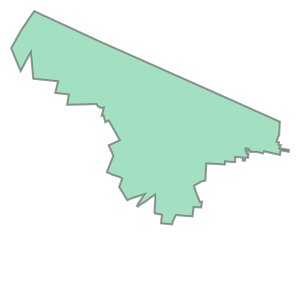

In [125]:
data['geometry'][4]

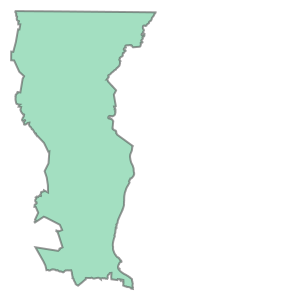

In [126]:
data['geometry'][0]